In [25]:
from PIL import Image, ImageDraw, ImageFont,ImageOps
import numpy as np
import glob
import pandas as pd

In [15]:
# 画像を読み込み、グレースケールに変換
image_path = '../data/sample6.jpg'
rgb_image = Image.open(image_path)
image = Image.open(image_path).convert('L')

# 画像をnumpy配列に変換
image_array = np.array(image)

# ピクセル値は黒0、白255

In [16]:
# 画像サイズの確認
originai_image_height,original_image_width = image_array.shape
print(originai_image_height,original_image_width)

887 610


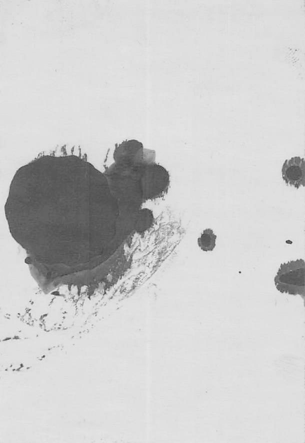

濃いピクセルの割合:しきい値100 10.26%


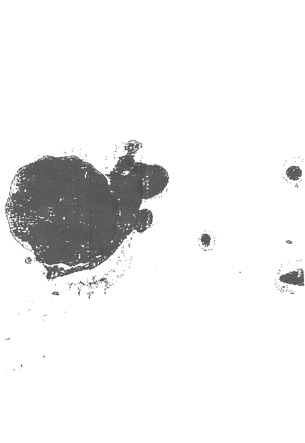

濃いピクセルの割合:しきい値125 13.19%


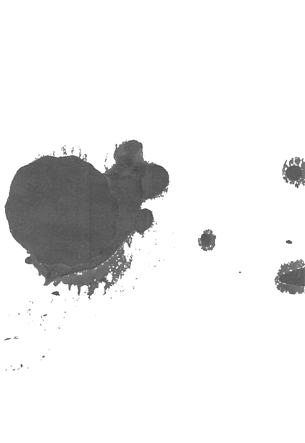

濃いピクセルの割合:しきい値150 13.98%


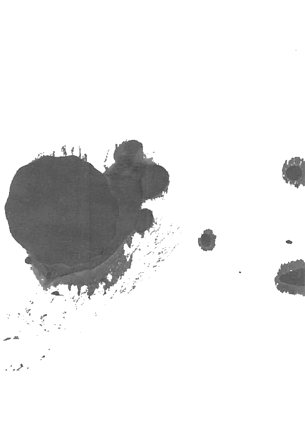

濃いピクセルの割合:しきい値175 14.87%


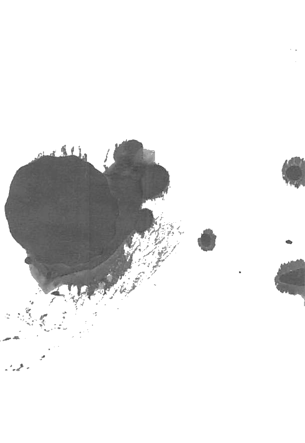

濃いピクセルの割合:しきい値200 16.15%


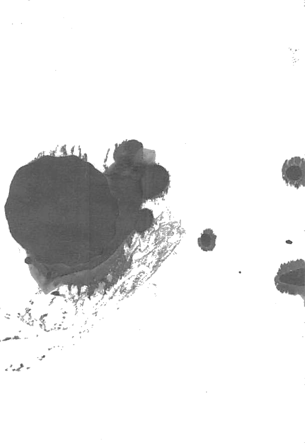

In [17]:
# 縮小して表示
resize_percent = 0.5

# オリジナル画像の表示
new_height = int(originai_image_height * resize_percent)
new_width = int(original_image_width * resize_percent)

# サイズを変更
resized_original_image = image.resize((new_width, new_height))
resized_original_image.show()

# しきい値を設定（しきい値の違いを比較）
threshold_array =[100,125,150,175,200]

resized_images = {} 

for idx,threshold in enumerate(threshold_array):

    # 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
    threshold_image_array = np.where(image_array <= threshold, image_array, 255)
    # numpy配列を画像に戻す
    threshold_image = Image.fromarray(threshold_image_array)

    dark_pixels = np.sum(threshold_image_array <= threshold)
    # 全体のピクセル数を取得
    total_pixels = threshold_image_array.size
    # 濃いピクセルの割合を計算
    dark_pixel_ratio = dark_pixels / total_pixels
    print(f'濃いピクセルの割合:しきい値{threshold} {dark_pixel_ratio:.2%}')

    image_width,image_height = threshold_image.size

    # 新しいサイズをパーセンテージに基づいて計算
    new_width = int(image_width * resize_percent)
    new_height = int(image_height * resize_percent)

    # サイズを変更して辞書に保存
    resized_images[f'resized_image_{idx}'] = threshold_image.resize((new_width, new_height))

    # 画像を表示
    resized_images[f'resized_image_{idx}'].show()


In [18]:
# オリジナルimageの各ピクセル値の出現数をカウント
pixel_counts = np.bincount(image_array.flatten(), minlength=256)

# 結果を表示
for value, count in enumerate(pixel_counts):
    # ピクセル値0は除外
    if count != 0:
        print(f'ピクセル値 {value}: {count}個')

ピクセル値 39: 1個
ピクセル値 43: 1個
ピクセル値 44: 1個
ピクセル値 45: 1個
ピクセル値 46: 1個
ピクセル値 49: 2個
ピクセル値 50: 2個
ピクセル値 51: 2個
ピクセル値 53: 1個
ピクセル値 54: 1個
ピクセル値 55: 1個
ピクセル値 56: 3個
ピクセル値 57: 1個
ピクセル値 58: 2個
ピクセル値 59: 7個
ピクセル値 60: 2個
ピクセル値 61: 2個
ピクセル値 62: 4個
ピクセル値 63: 5個
ピクセル値 64: 10個
ピクセル値 65: 7個
ピクセル値 66: 6個
ピクセル値 67: 10個
ピクセル値 68: 12個
ピクセル値 69: 10個
ピクセル値 70: 14個
ピクセル値 71: 28個
ピクセル値 72: 29個
ピクセル値 73: 22個
ピクセル値 74: 24個
ピクセル値 75: 41個
ピクセル値 76: 45個
ピクセル値 77: 65個
ピクセル値 78: 99個
ピクセル値 79: 111個
ピクセル値 80: 160個
ピクセル値 81: 256個
ピクセル値 82: 288個
ピクセル値 83: 508個
ピクセル値 84: 821個
ピクセル値 85: 1191個
ピクセル値 86: 1747個
ピクセル値 87: 2455個
ピクセル値 88: 3137個
ピクセル値 89: 3849個
ピクセル値 90: 4413個
ピクセル値 91: 4739個
ピクセル値 92: 4749個
ピクセル値 93: 4815個
ピクセル値 94: 4407個
ピクセル値 95: 3749個
ピクセル値 96: 3411個
ピクセル値 97: 3147個
ピクセル値 98: 2918個
ピクセル値 99: 2449個
ピクセル値 100: 1734個
ピクセル値 101: 1352個
ピクセル値 102: 1045個
ピクセル値 103: 942個
ピクセル値 104: 827個
ピクセル値 105: 803個
ピクセル値 106: 732個
ピクセル値 107: 782個
ピクセル値 108: 782個
ピクセル値 109: 709個
ピクセル値 110: 683個
ピクセル値 111: 640個
ピクセル値 112: 663個
ピクセル

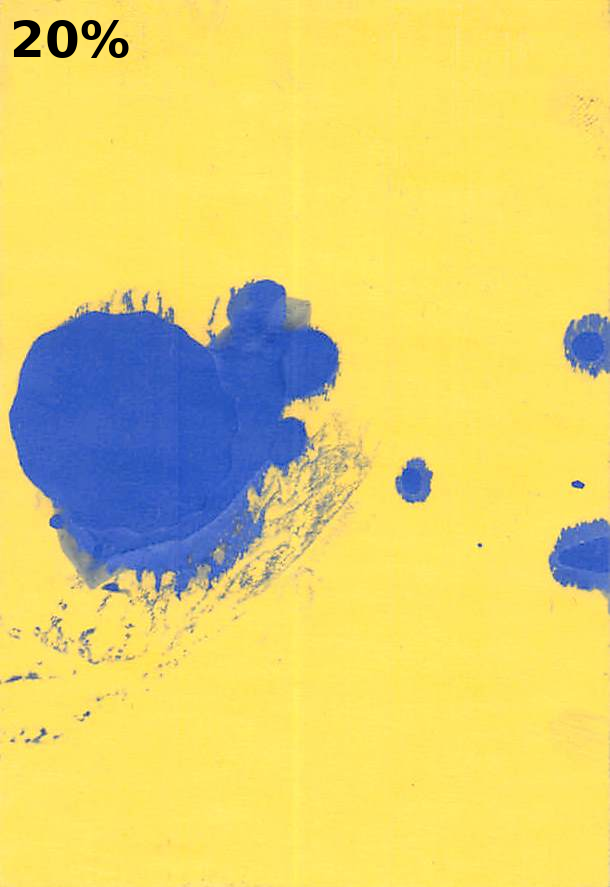

In [19]:
# オリジナルimageにテキストを入れ込み保存

# ImageDrawオブジェクトを作成
draw = ImageDraw.Draw(rgb_image)

# フォントの設定（システムのデフォルトフォントを使用）
font = ImageFont.load_default()

# フォントサイズを指定します（例: 40）
font = ImageFont.truetype("DejaVuSans-Bold.ttf", 50) 

# テキストを追加する位置（x, y）を指定
position = (10, 10)

# 描画するテキスト
text = "20%"

# テキストの色（黒）
text_color = 0  

# 画像にテキストを描画
draw.text(position, text, fill=text_color, font=font)

rgb_image

In [20]:
# 加工したimageの保存
output_path = '../data/new_sample.jpeg'
rgb_image.save(output_path)

In [33]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
files = glob.glob(f'{directory_path}/*.jpg')

files.sort()
# ファイルリストを表示
print(files)

['../data/sample3.jpg', '../data/sample4.jpg', '../data/sample5.jpg', '../data/sample6.jpg', '../data/sample7.jpg']


In [34]:
def add_border_and_padding(image, border_size=5, padding_size=10):
    # 白い余白を追加
    image_with_padding = ImageOps.expand(image, border=padding_size, fill=(255, 255, 255))
    
    return image_with_padding

3094 907


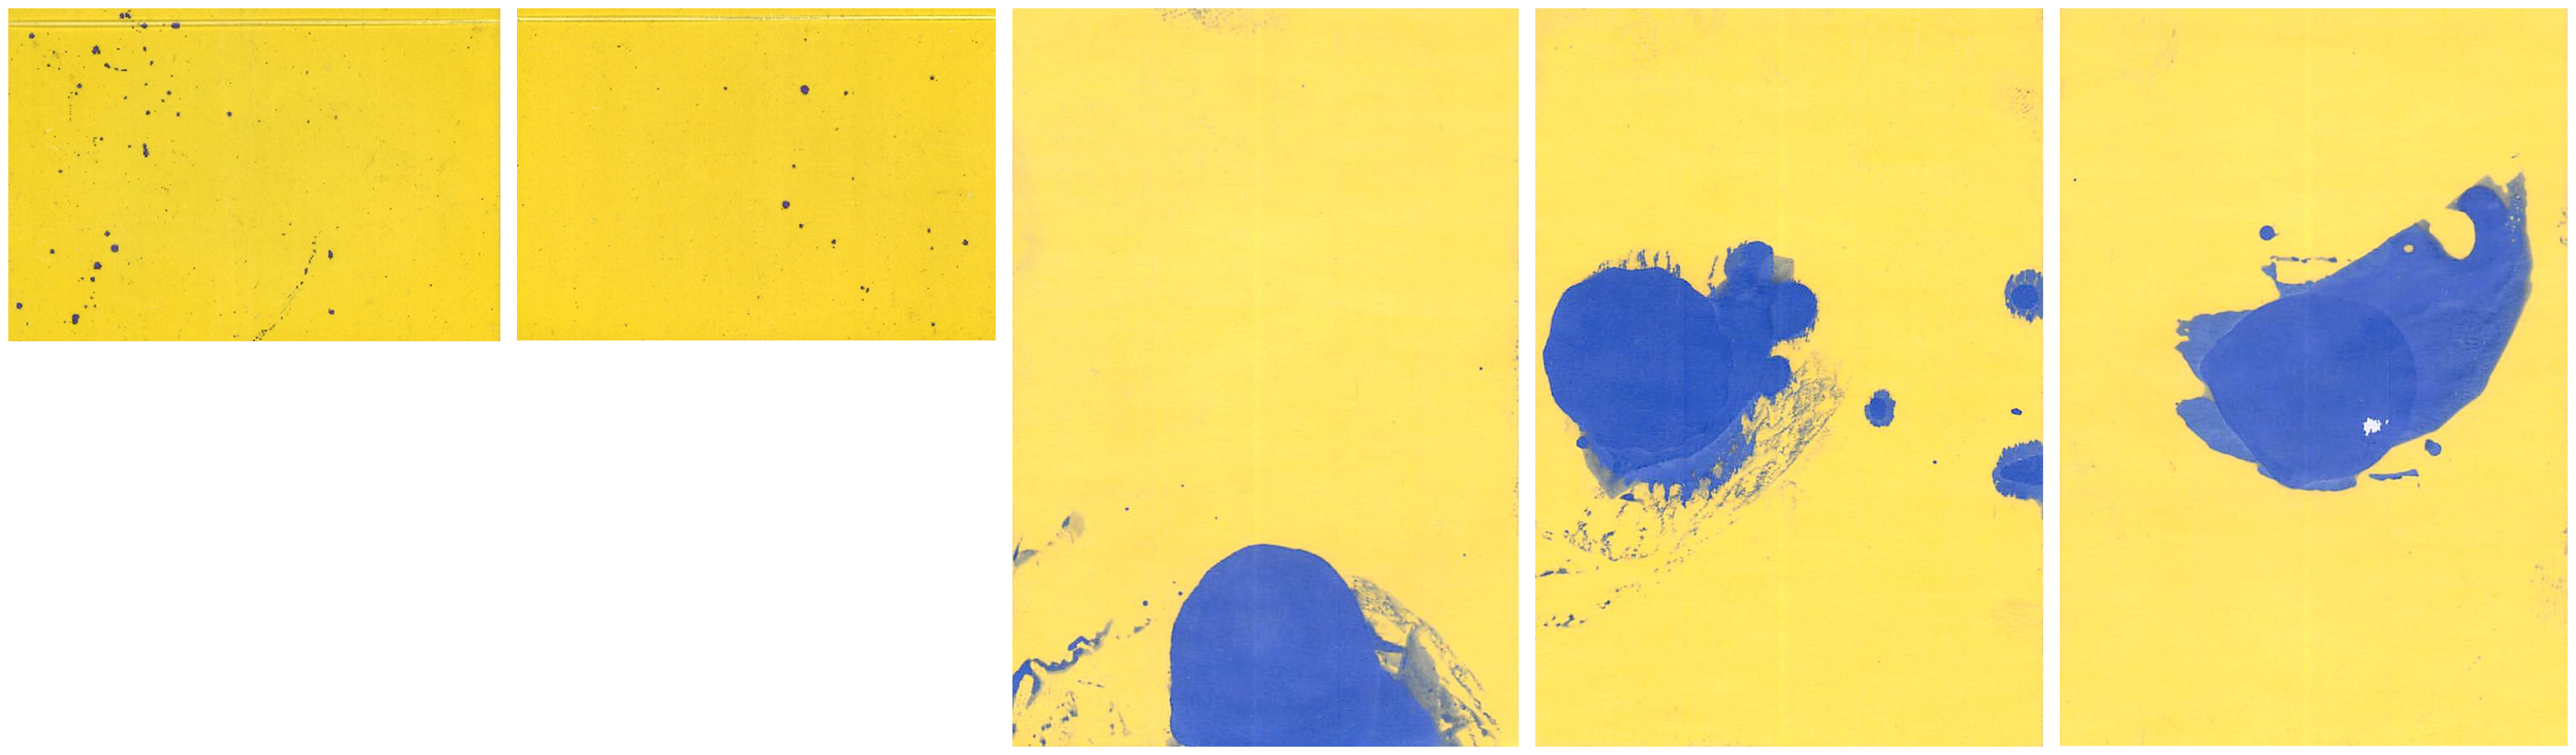

In [35]:
image_list = []

# imageを結合して保存
for file_path in files:
    image = add_border_and_padding(Image.open(file_path))
    image_list.append(image)


widths, heights = zip(*(img.size for img in image_list))
# 結合後の画像の幅と高さを計算
total_width = sum(widths)
max_height = max(heights)

print(total_width,max_height)

# 新しい画像を作成（RGBモードで白背景）
new_image = Image.new('RGB', (total_width, max_height), (255, 255, 255))

# 各画像を新しい画像に貼り付け
x_offset = 0
for img in image_list:
    new_image.paste(img, (x_offset, 0))
    x_offset += img.width

# 結合した画像を表示
new_image.show()

In [72]:
path = '../data/imageinfo.csv'
df = pd.read_csv(path)
df

,name,value
0,img1,NaN
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


In [73]:
df['value'].iloc[0]= dark_pixel_ratio
df

/tmp/ipykernel_2430/2660744495.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['value'].iloc[0]= dark_pixel_ratio
/tmp/ipykernel_2430/2660744495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,name,value
0,img1,0.161545
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


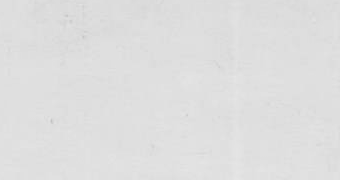

In [74]:
# 画像の切り取り
im_crop = image.crop((60, 20, 400, 200))
im_crop

In [75]:
def crop_center(pil_img, crop_area):
    img_width, img_height = pil_img.size
    crop_width = int(img_width * (1-crop_area))
    crop_height = int(img_height * (1-crop_area))
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

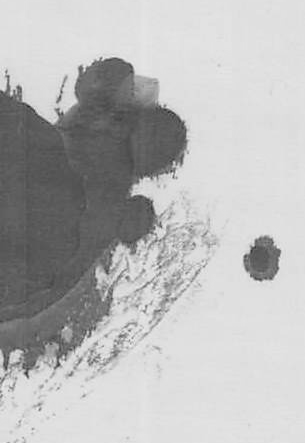

In [76]:
croped_img = crop_center(image,0.5)
croped_img